In [1]:
%matplotlib inline
import pandas as pd

## Load results

In [2]:
series = [
    'masked',
    'unmasked',
    'masked_reversed',
    'unmasked_reversed',
]
series = [
    'masked',
    'masked_no_symbolic',
    'masked_no_symbolic_no_selective',
    'masked_no_selective',
    'masked_symbolic_low_order',
    'unmasked',
    'unmasked_no_symbolic',
    # 'masked_reversed',
    'unmasked_reversed',
]
series_names = series
# series_names = [
#     'Masked',
#     'Unmasked',
#     'Masked R',
#     'Unmasked R',
# ]
total_timess = {
   s: pd.read_csv(f'data/analysis_new_property_2_raw_{s}0.csv')
   for s in series 
}

## Raw results

In [3]:
from ipywidgets import interact

In [4]:
@interact
def _(series=series):
    return total_timess[series]

interactive(children=(Dropdown(description='series', options=('masked', 'masked_no_symbolic', 'masked_no_symbo…

## Comparison

In [5]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})
comparison.columns = series_names
comparison

,masked,masked_no_symbolic,masked_no_symbolic_no_selective,masked_no_selective,masked_symbolic_low_order,unmasked,unmasked_no_symbolic,unmasked_reversed
Flow*,81.213639,80.129386,80.541870,81.520876,81.078617,81.510925,80.460656,81.416929
P,4.205520,7.359039,11.364032,9.580814,4.129417,13.780688,17.674069,13.595848
Q,52.319785,16.465557,18.692839,41.018942,20.856542,188.273943,56.042079,199.301698
P | F(Q),113.279619,47.877284,60.349096,101.432762,50.205299,404.349202,147.651801,426.027369
tentative eval,0.588947,0.579161,0.583094,0.614252,1.775768,3.106601,3.037551,3.104662
root detection,0.011845,1.034386,1.194548,0.007584,0.234784,0.039815,4.164756,0.038230
composing flowpipe,7.830490,21.591083,27.532917,23.041716,8.855361,31.448909,64.296751,31.466062
composing atomic,47.460966,0.004737,0.004715,26.100791,13.693420,164.158104,0.017033,173.364218
Total,137.992423,104.230733,110.861127,132.382802,106.321356,283.828217,154.448045,294.571474


In [6]:
comparison.to_csv("data/comparison7.csv")

In [7]:
comparison_stds = pd.DataFrame({
    s: total_times.std()
    for s, total_times in total_timess.items()
})
comparison_stds.columns = series_names
comparison_stds

,masked,masked_no_symbolic,masked_no_symbolic_no_selective,masked_no_selective,masked_symbolic_low_order,unmasked,unmasked_no_symbolic,unmasked_reversed
Flow*,1.442609,1.074597,0.878498,1.094016,1.498634,1.135371,1.279949,1.580568
P,0.149949,0.485812,0.803159,0.334052,0.175493,0.598640,3.023664,0.712081
Q,3.853776,5.271374,1.866498,2.555068,0.711195,13.179838,2.846077,24.550582
P | F(Q),7.700453,10.563644,4.387040,5.303063,1.420088,26.384438,9.211308,49.638005
tentative eval,0.047230,0.078604,0.091610,0.064315,0.089650,0.167506,0.157816,0.188989
root detection,0.004555,0.249910,0.060381,0.003798,0.013359,0.007385,0.211980,0.006893
composing flowpipe,0.186997,4.961515,2.118385,1.007282,0.193410,0.550715,4.246519,1.350649
composing atomic,3.778058,0.000452,0.000393,1.652737,0.535658,9.702473,0.000868,19.475412
Total,4.215470,5.532708,2.162584,2.868655,1.848289,12.956126,4.812720,25.487246


In [8]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
masked,4.205520,52.319785
masked_no_symbolic,7.359039,16.465557
masked_no_symbolic_no_selective,11.364032,18.692839
masked_no_selective,9.580814,41.018942
masked_symbolic_low_order,4.129417,20.856542
unmasked,13.780688,188.273943
unmasked_no_symbolic,17.674069,56.042079
unmasked_reversed,13.595848,199.301698


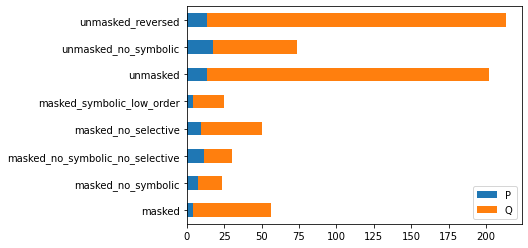

In [9]:
p = comparison2.plot(kind='barh', stacked=True, grid=False)
p

In [10]:
p.get_figure().savefig('images/comparison-analysis7-bar-chart-1.pdf')

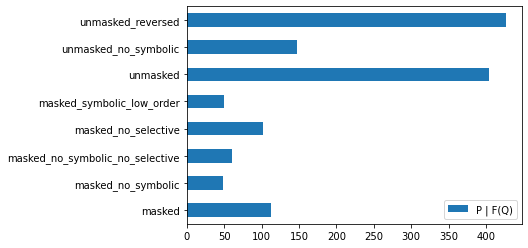

In [11]:
comparison3 = comparison.loc[['P | F(Q)'],:].transpose()
comparison3.plot(kind='barh')

In [12]:
comparison4 = comparison.loc[['Flow*', 'P', 'Q'],:].transpose()
comparison4

,Flow*,P,Q
masked,81.213639,4.205520,52.319785
masked_no_symbolic,80.129386,7.359039,16.465557
masked_no_symbolic_no_selective,80.541870,11.364032,18.692839
masked_no_selective,81.520876,9.580814,41.018942
masked_symbolic_low_order,81.078617,4.129417,20.856542
unmasked,81.510925,13.780688,188.273943
unmasked_no_symbolic,80.460656,17.674069,56.042079
unmasked_reversed,81.416929,13.595848,199.301698


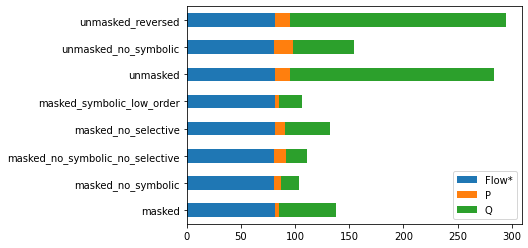

In [13]:
p = comparison4.plot(kind='barh', stacked=True, grid=False)
p

In [14]:
p.get_figure().savefig('images/comparison-analysis7-bar-chart-2.pdf')

In [15]:
comparison5 = comparison4.copy()

In [16]:
rem = comparison.loc['Total', :] - comparison4.sum(axis=1)
rem

masked                             0.253480
masked_no_symbolic                 0.276752
masked_no_symbolic_no_selective    0.262386
masked_no_selective                0.262168
masked_symbolic_low_order          0.256781
unmasked                           0.262661
unmasked_no_symbolic               0.271241
unmasked_reversed                  0.256998
dtype: float64

In [17]:
comparison5.loc[:,'Remainder'] = rem

In [19]:
comparison5

,Flow*,P,Q,Remainder
masked,81.213639,4.205520,52.319785,0.253480
masked_no_symbolic,80.129386,7.359039,16.465557,0.276752
masked_no_symbolic_no_selective,80.541870,11.364032,18.692839,0.262386
masked_no_selective,81.520876,9.580814,41.018942,0.262168
masked_symbolic_low_order,81.078617,4.129417,20.856542,0.256781
unmasked,81.510925,13.780688,188.273943,0.262661
unmasked_no_symbolic,80.460656,17.674069,56.042079,0.271241
unmasked_reversed,81.416929,13.595848,199.301698,0.256998


In [18]:
comparison5.to_csv("data/comparison-remainder-analysis7.csv")

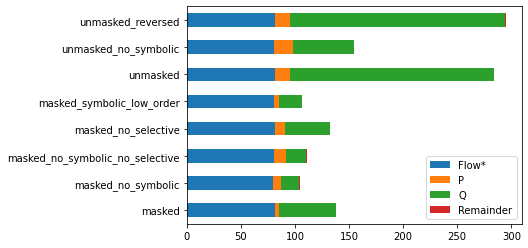

In [20]:
comparison5.plot(kind='barh', stacked=True, grid=False)

In [21]:
_.get_figure().savefig(
    'images/key-comparison-analysis7-bar-chart.pdf')

In [22]:
comparison6 = comparison.loc[['Flow*', 'P', 'Q', 'Total'], :].transpose()

In [23]:
comparison6

,Flow*,P,Q,Total
masked,81.213639,4.205520,52.319785,137.992423
masked_no_symbolic,80.129386,7.359039,16.465557,104.230733
masked_no_symbolic_no_selective,80.541870,11.364032,18.692839,110.861127
masked_no_selective,81.520876,9.580814,41.018942,132.382802
masked_symbolic_low_order,81.078617,4.129417,20.856542,106.321356
unmasked,81.510925,13.780688,188.273943,283.828217
unmasked_no_symbolic,80.460656,17.674069,56.042079,154.448045
unmasked_reversed,81.416929,13.595848,199.301698,294.571474


In [24]:
comparison6.to_csv('data/key-comparison-analysis-7.csv')

In [25]:
comparison3.loc['unmasked',:] / comparison3.loc['masked',:]

P | F(Q)    3.569479
dtype: float64

In [26]:
comparison3.loc['unmasked_no_symbolic',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    3.083964
dtype: float64

In [27]:
comparison3.loc['masked',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    2.366041
dtype: float64

In [28]:
comparison3.loc['unmasked',:] / comparison3.loc['unmasked_no_symbolic',:]

P | F(Q)    2.738532
dtype: float64

In [29]:
comparison3.loc['masked_symbolic_low_order',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    1.048625
dtype: float64